In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f = np.load('f.npy')
f.shape

(300, 100, 100)

In [5]:
f[0,0, :]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

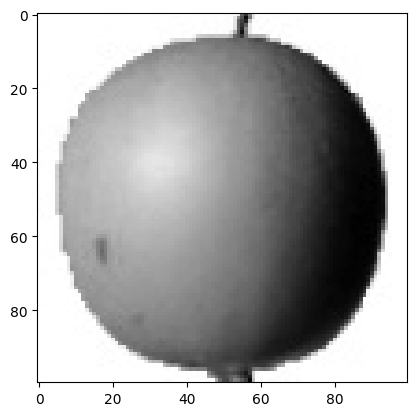

In [8]:
plt.imshow(f[0],cmap='gray_r')
plt.show()

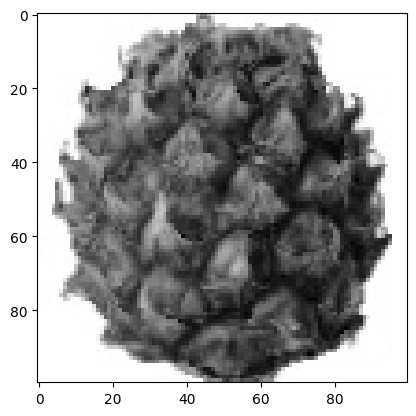

In [9]:
plt.imshow(f[100],cmap='gray_r')
plt.show()

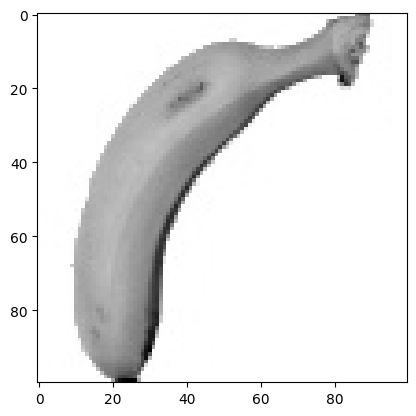

In [11]:
plt.imshow(f[210],cmap='gray_r')
plt.show()

샘플 차원 변경

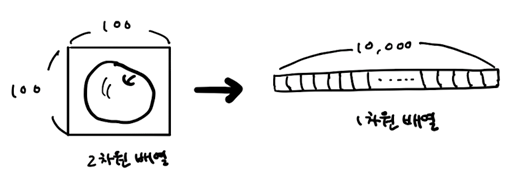

In [13]:
apple = f[:100].reshape(-1,100*100)  # (100,100,100)
pineapple = f[100:200].reshape(100,-1)
banana = f[200:].reshape(100,100*100)

In [17]:
temp = np.array([1,2,3,4,5,6,7,8,9,10])
temp.reshape(2,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [18]:
apple.shape

(100, 10000)

In [27]:
def showImage(imgdata):
  for idx, img in  enumerate(imgdata):
    plt.subplot(10,10,idx+1)
    plt.imshow(img.reshape(100,100),cmap='gray_r')
    plt.axis('off')

  plt.show()

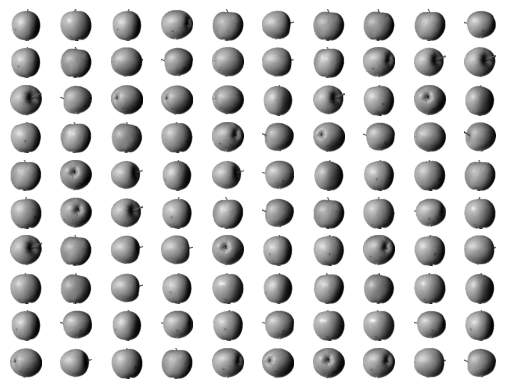

In [28]:
showImage(apple)

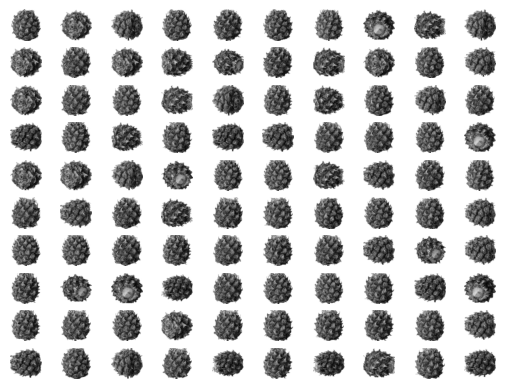

In [29]:
showImage(pineapple)

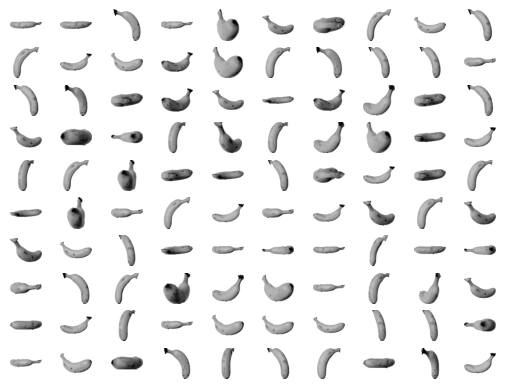

In [30]:
showImage(banana)

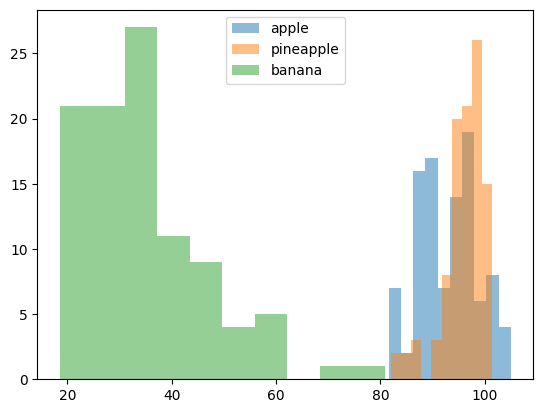

In [41]:
# 이미지 전체에 대한 픽셀의 평균값들의 분포
import numpy as np
plt.hist(np.mean(apple,axis=1), alpha = 0.5,label = 'apple')
plt.hist(np.mean(pineapple,axis=1),alpha = 0.5, label = 'pineapple')
plt.hist(np.mean(banana,axis=1),alpha = 0.5, label='banana')
plt.legend()
plt.show()

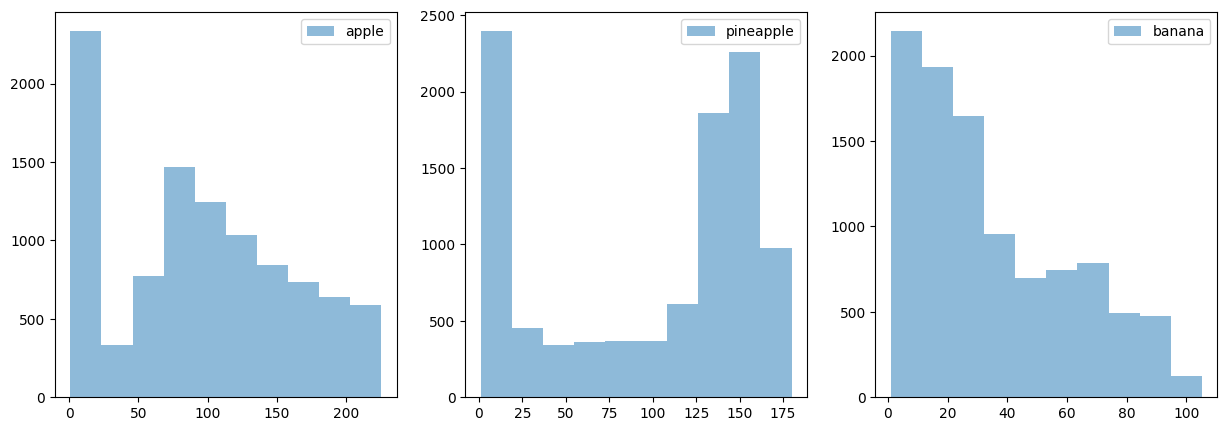

In [46]:
# 이미지 를 이루는 각 픽셀의  평균값들의 분포
import numpy as np
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(np.mean(apple,axis=0), alpha = 0.5,label = 'apple')
plt.legend()

plt.subplot(1,3,2)
plt.hist(np.mean(pineapple,axis=0),alpha = 0.5, label = 'pineapple')
plt.legend()

plt.subplot(1,3,3)
plt.hist(np.mean(banana,axis=0),alpha = 0.5, label='banana')
plt.legend()
plt.show()

각 이미지의 픽셀 평균값으로 하나의 이미지를 *그려보자*

In [53]:
def meanImage(imgdata):
  imgdata_mean =  np.mean(imgdata, axis=0)
  plt.imshow(imgdata_mean.reshape(100,100), cmap='gray_r')
  plt.axis('off')
  plt.show()
  return imgdata_mean

In [62]:
# 전체데이터에서(픽셀) - 파인애플의(픽셀) 평균값을 빼면 오차가 발생
# 오차가 적을 수록 파인애플일 확률이 높다.
# 그래서 오차별로 정렬을 하고 오차가 작은 순서대로 100개를 추출하면
# 평균 이미지정보와 유사한 이미지들만 추출

In [88]:
def findImage(imagedata):
  image_mean = meanImage(imagedata)
  print(image_mean.shape)
  mean_f =  (f - image_mean.reshape(100,100))
  mean_2 = np.mean(mean_f,axis=(1,2))
  indexes = np.argsort(mean_2)
  showImage( f[indexes[:100]].reshape(-1,100*100) )

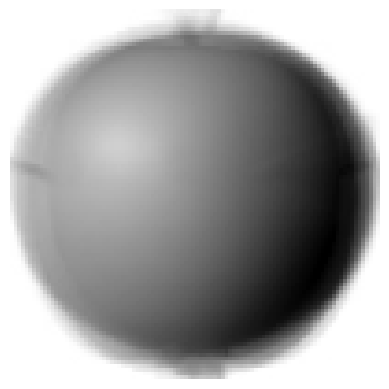

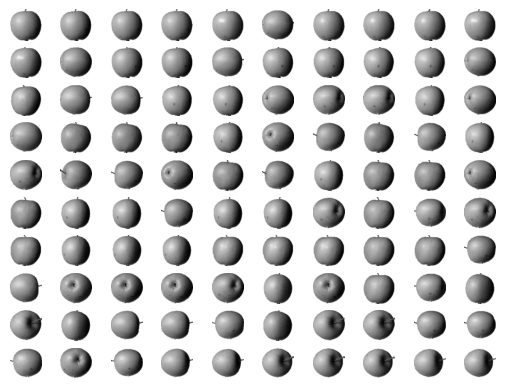

In [108]:
m = meanImage(apple)
f_diff = np.abs(f - m.reshape(100,100))
diff_mean = np.mean(f_diff, axis=(1,2))
find_indexs = np.argsort(diff_mean)[:100]
showImage(f[find_indexs])